# Preliminary Research

Preliminary Research on Wine quality dataset  

In this preliminary research, I will focus on simple OLS to predict quality based on given variables. So, the dependent variable will be the ``quality``, and others will be the independent variables. 

In [42]:
# Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

In [29]:
wines = pd.read_csv('datasets/winequality-all.csv')
wines.sample(5)  # breifly check the data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4264,0,8.3,0.40,0.41,8.20,0.050,15.0,122.0,0.99790,3.39,0.49,9.3,5
2375,0,8.3,0.14,0.45,1.50,0.039,18.0,98.0,0.99215,3.02,0.56,11.0,6
5252,0,6.3,0.32,0.17,17.75,0.060,51.0,190.0,0.99916,3.13,0.48,8.8,6
2340,0,5.8,0.20,0.30,1.50,0.031,21.0,57.0,0.99115,3.44,0.55,11.0,6
509,1,13.3,0.29,0.75,2.80,0.084,23.0,43.0,0.99860,3.04,0.68,11.4,7


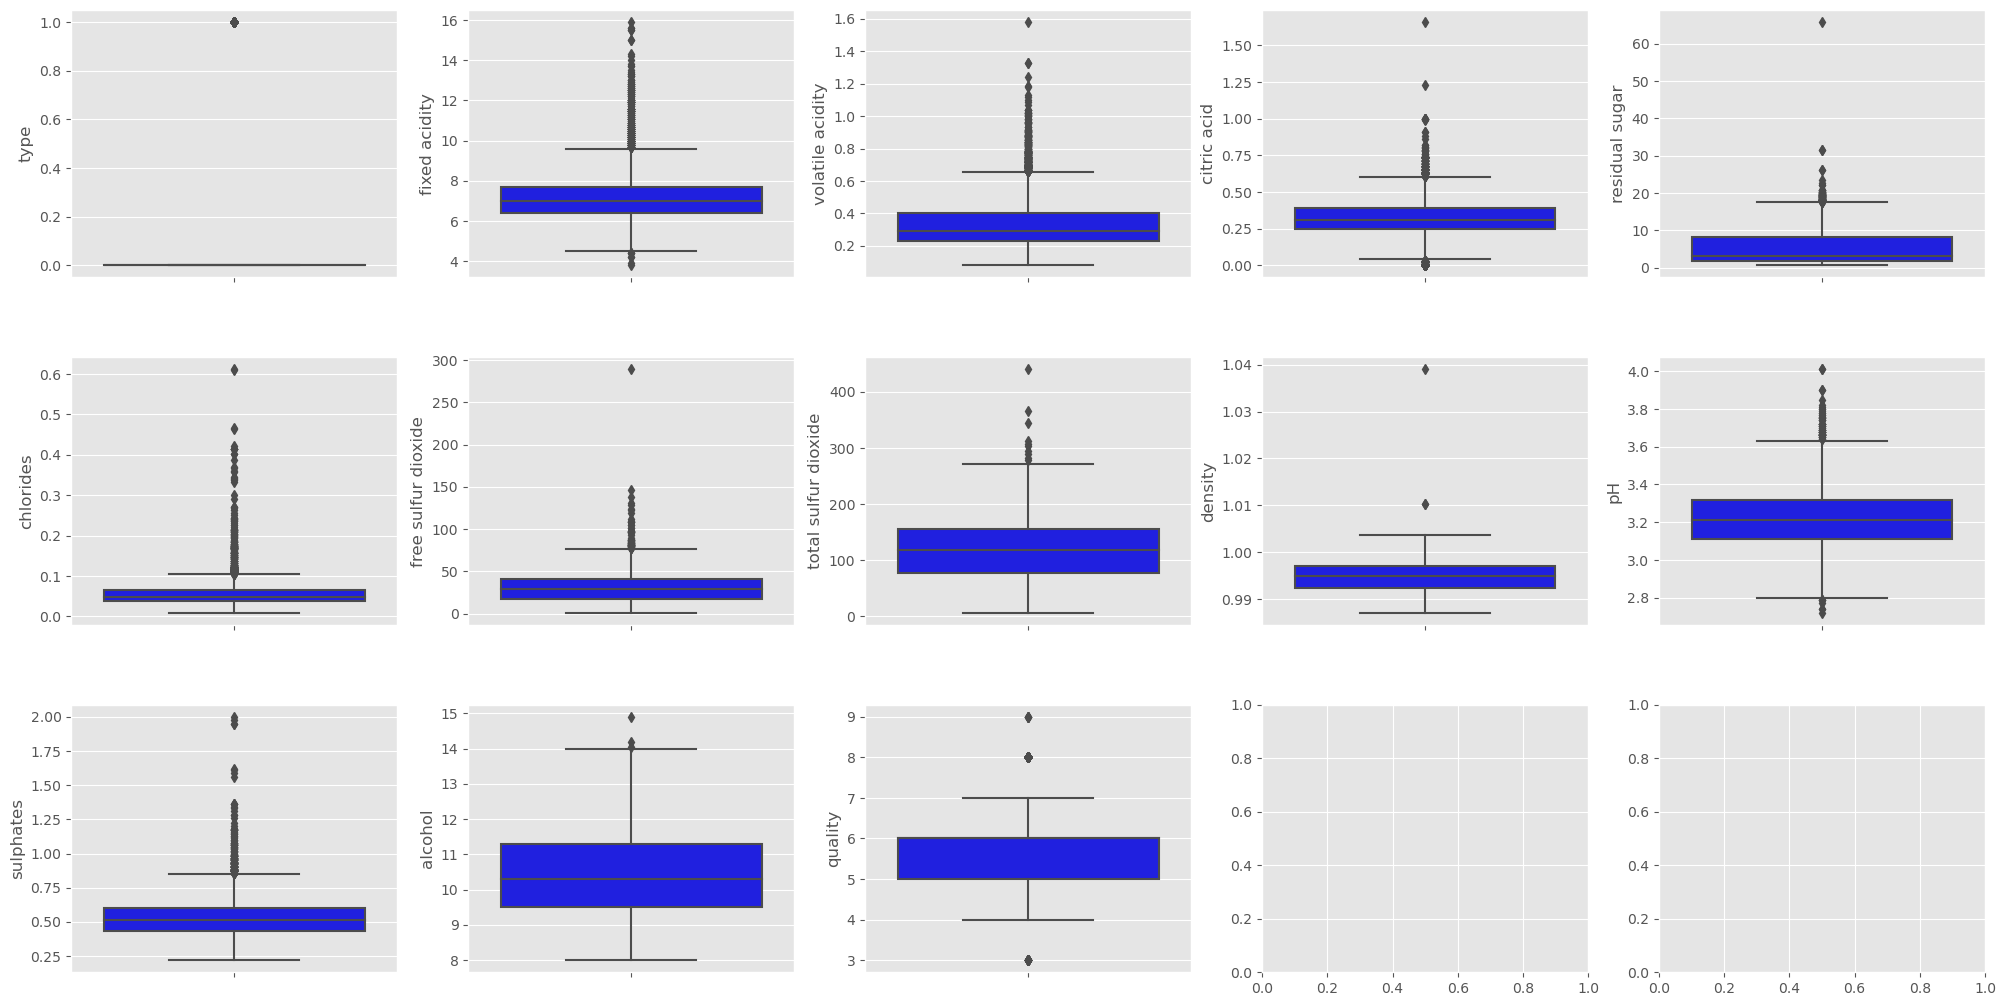

In [30]:
# Create box plots to see if there is outlier. 
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in wines.items():
    sns.boxplot(y=col, data=wines, color='b', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

We can see that there is a lot of outliers which might affect the results of the regression. So I will remove those outliers by using iqr standard for every variables, except for the ``type`` variable which is added to differ red wine and white wine. 

In [32]:
def del_outlier(df):
        df1 = df.copy()
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns[~df.columns.isin(['type','quality'])]:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns[~df.columns.isin(['type','quality'])]:
            df1[col] = df[col]

        return(df1)

wines1 = del_outlier(wines)

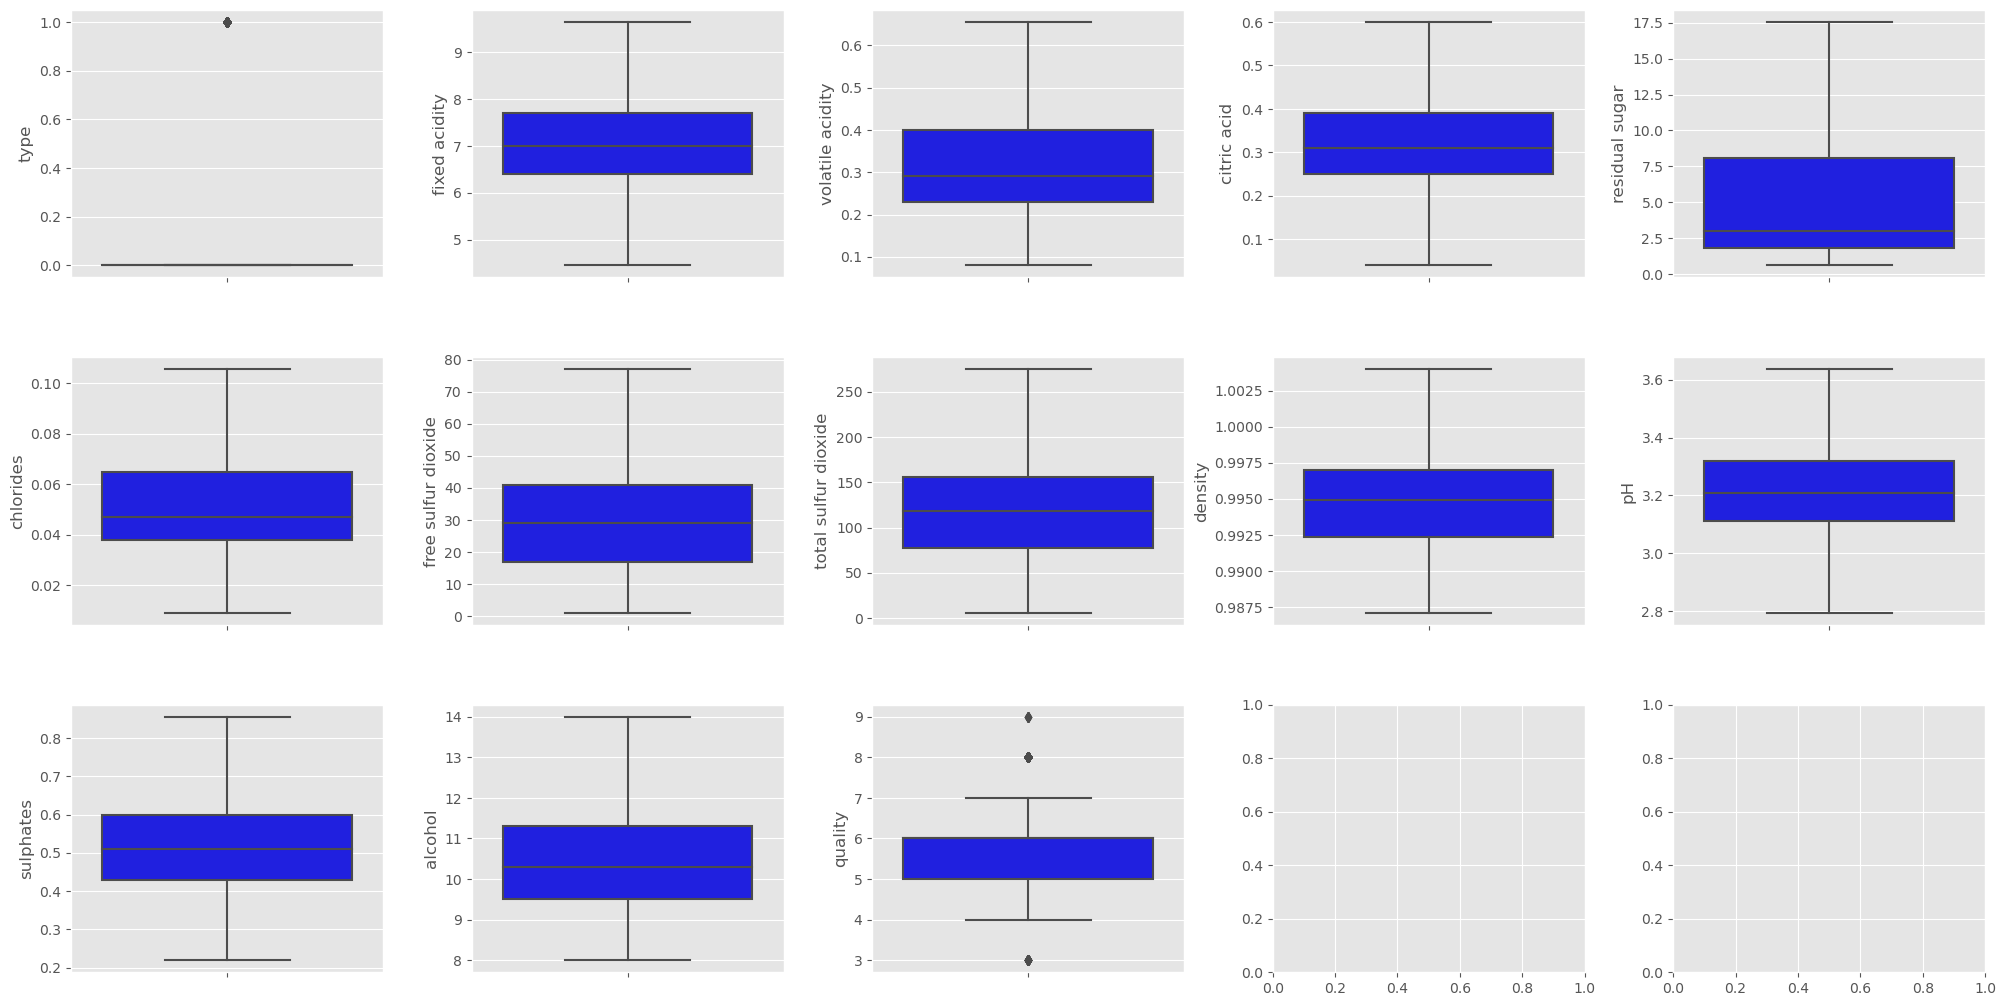

In [33]:
# Check if the outliers are removed.
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in wines1.items():
    sns.boxplot(y=col, data=wines, color='b', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [34]:
wines1.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.246114,7.142173,0.332612,0.316180,5.407727,0.053230,30.339541,115.671926,0.994689,3.217638,0.526667,10.491624,5.818378
std,0.430779,1.066080,0.144376,0.131856,4.613702,0.021289,16.904806,56.256191,0.002942,0.157901,0.131196,1.192136,0.873255
min,0.000000,4.450000,0.080000,0.040000,0.600000,0.009000,1.000000,6.000000,0.987110,2.795000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,9.650000,0.655000,0.600000,17.550000,0.105500,77.000000,274.500000,1.003965,3.635000,0.855000,14.000000,9.000000


## Relationship between variables

From the EDA, we have seen that there is 
- positive correlation between ``alcohol`` and ``quality``.
- weak negative correlation between ``volatile acidity``, ``chlorides``, ``density`` and ``quality``. 

Let's check this again with the removed outliers dataset. 

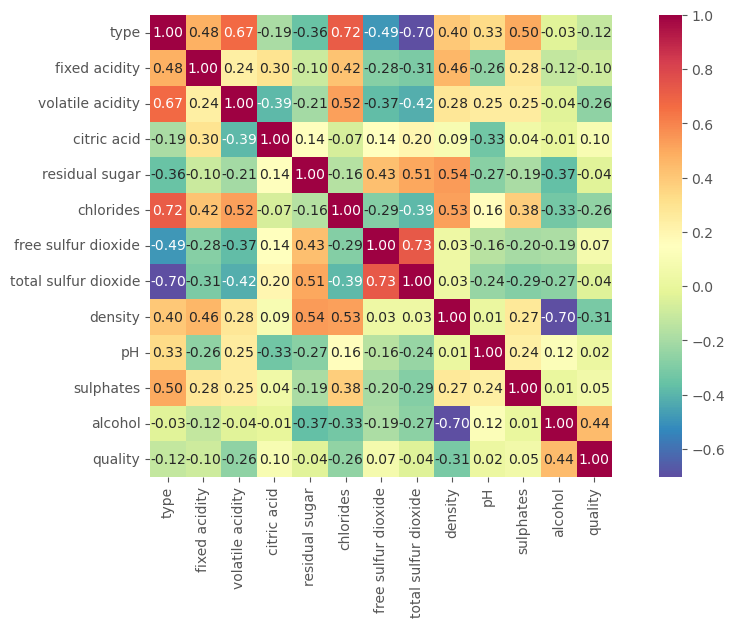

In [35]:
# Correlation heatmap
hm = sns.heatmap(wines1.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=wines.columns, 
                 xticklabels=wines1.columns,cmap="Spectral_r")
plt.show()

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

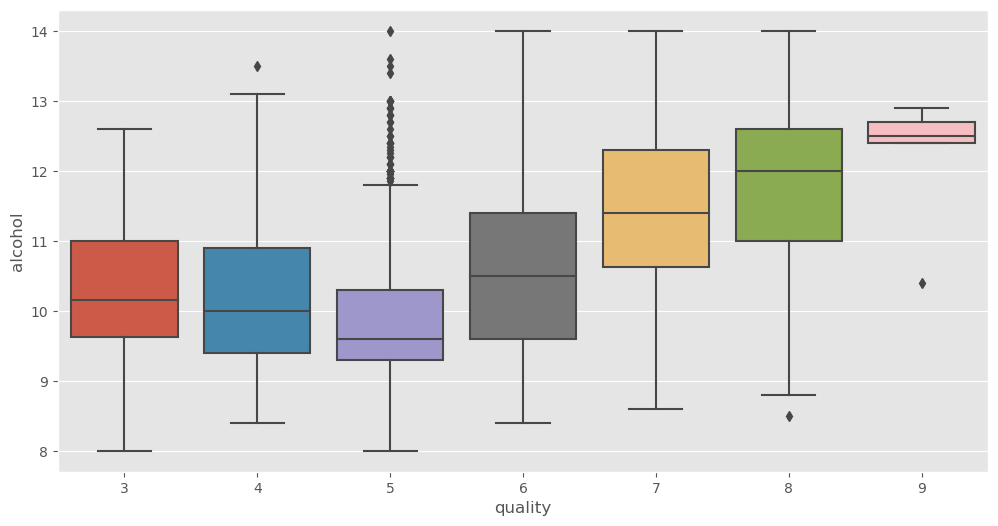

In [38]:
# Alcohol and Quality
sns.boxplot(x="quality", y="alcohol", data=wines1)

### Multicollinearity 

Due to the characteristics of the relationship between independent variables, such as acidity and PH, it is assumable that there might be a collinearity or multicollinearity problem in the dataset. 

As we have seen from the previous correlation heatmap, there are many variables have strong correlation with each other.

Let's use vif(variance inflation factor) to check the multicollinearity again.


In [54]:
# Separate dependent and independent variables
y = wines1['quality']
X = wines1[['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',   
'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

In [70]:
# Run a regression with full model
x = sm.add_constant(X)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     228.4
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        05:20:13   Log-Likelihood:                -7192.5
No. Observations:                6497   AIC:                         1.441e+04
Df Residuals:                    6484   BIC:                         1.450e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   88.9582     13.937      6.383      0.000      61.637     116.279
type                     0.3604      0.059      6.064      0.000       0.244       0.477
fixed acidity            0.0692      0.017      4.002      0.000       0.035       0.103
volatile acidity        -1.6426      0.095    -17.343      0.000      -1.828      -1.457
citric acid              0.0223      0.087      0.255      0.799      -0.149       0.194
residual sugar           0.0558      0.006      9.577      0.000       0.044       0.067
chlorides               -1.1864      0.712     -1.667      0.096      -2.582       0.209
free sulfur dioxide      0.0066      0.001      8.019      0.000       0.005       0.008
total sulfur dioxide    -0.0017      0.000     -5.054      0.000      -0.002      -0.001
density                -88.0431     14.166     -6.215      0.000    -115.813     -60.273
pH                       0.3632      0.088      4.106      0.000       0.190       0.537
sulphates                0.8679      0.087     10.025      0.000       0.698       1.038
alcohol                  0.2401      0.018     13.511      0.000       0.205       0.275
==============================================================================
Omnibus:                      128.998   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.747
Skew:                           0.034   Prob(JB):                     3.60e-60
Kurtosis:                       4.003   Cond. No.                     2.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
#vif dataframe
vif_df = pd.DataFrame()
vif_df['feature'] = X.columns

vif_df['VIF'] = [variance_inflation_factor(X.values, i)
                for i in range(len(X.columns))]

print(vif_df)

                 feature          VIF
0                   type     8.112173
1          fixed acidity    97.284060
2       volatile acidity    14.148365
3            citric acid    10.596240
4         residual sugar     3.766930
5              chlorides    19.138752
6    free sulfur dioxide     9.752637
7   total sulfur dioxide    21.171270
8                density  1151.553275
9                     pH   686.057242
10             sulphates    24.557067
11               alcohol   122.026451


We can see that the values of VIF are mostly high(>5 or 10) which indicates the possibility of the multicollinearity problem in the variables.

To solve this, I'll remove most highly correlated explanatory variable step by step by using *vif selection method*. 

In [61]:
# Remove multicollinarity recursively using Python

from statsmodels.stats.outliers_influence import variance_inflation_factor


def X_filter_multicollinearity(X, thresh=10.0):

    from datetime import datetime
    start_tm = datetime.now()
    variables = list(range(X.shape[1]))
    dropped = True

    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix) 
               for ix in range(X.iloc[:, variables].shape[1])]
        maxloc = vif.index(max(vif))

        if max(vif) > thresh:
            print('==> [Dropped variable] : ' + X.iloc[:, variables].columns[maxloc])
            del variables[maxloc]
            
            if len(variables) > 1:
                dropped = True

    print('[Remaining variables] :')
    print(X.columns[variables])
    print('[Elapsed time] :', str(datetime.now() - start_tm))

    return variables

# run the UDF

X_remained_idx = X_filter_multicollinearity(X)
print('X index after filtering multicollinearity:', X_remained_idx)

==> [Dropped variable] : density
==> [Dropped variable] : pH
==> [Dropped variable] : fixed acidity
==> [Dropped variable] : alcohol
==> [Dropped variable] : total sulfur dioxide
==> [Dropped variable] : sulphates
==> [Dropped variable] : chlorides
[Remaining variables] :
Index(['type', 'volatile acidity', 'citric acid', 'residual sugar',
       'free sulfur dioxide'],
      dtype='object')
[Elapsed time] : 0:00:01.198911
X index after filtering multicollinearity: [0, 2, 3, 4, 6]


Now, we have ``type``, ``volatile acidity``, ``citric acid``, ``residual sugar``, ``free sulfur dioxide`` after selecting variables using *vif selection method*.

In [63]:
# Setting variables again
y = wines1['quality']
X_1 = wines1[['type', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide']]

In [67]:
# Run OLS regression
x1 = sm.add_constant(X_1)
results = sm.OLS(y, x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     110.3
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          3.38e-112
Time:                        05:17:33   Log-Likelihood:                -8072.9
No. Observations:                6497   AIC:                         1.616e+04
Df Residuals:                    6491   BIC:                         1.620e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.4857      0.055    118.201      0.000       6.378       6.593
type                    0.1513      0.035      4.264      0.000       0.082       0.221
volatile acidity       -1.9336      0.104    -18.547      0.000      -2.138      -1.729
citric acid            -0.0398      0.086     -0.460      0.645      -0.209       0.130
residual sugar         -0.0165      0.003     -6.437      0.000      -0.022      -0.011
free sulfur dioxide     0.0013      0.001      1.779      0.075      -0.000       0.003
==============================================================================
Omnibus:                      103.446   Durbin-Watson:                   1.665
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.056
Skew:                           0.248   Prob(JB):                     1.90e-27
Kurtosis:                       3.456   Cond. No.                         420.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# Remove 'citric acid', and 'free sulfur dioxide', statisticall insignificant variable
# Setting variables again
y = wines1['quality']
X_2 = wines1[['type', 'volatile acidity', 'residual sugar']]

# Run OLS regression again
x2 = sm.add_constant(X_2)
results = sm.OLS(y, x2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     182.7
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          9.85e-114
Time:                        05:19:05   Log-Likelihood:                -8074.6
No. Observations:                6497   AIC:                         1.616e+04
Df Residuals:                    6493   BIC:                         1.618e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.5102      0.033    199.251      0.000       6.446       6.574
type                 0.1329      0.034      3.910      0.000       0.066       0.200
volatile acidity    -1.9320      0.097    -19.932      0.000      -2.122      -1.742
residual sugar      -0.0151      0.002     -6.271      0.000      -0.020      -0.010
==============================================================================
Omnibus:                      101.140   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.277
Skew:                           0.242   Prob(JB):                     4.62e-27
Kurtosis:                       3.463   Cond. No.                         70.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the R-squared and the adjusted R-Squared values are too small, let's try to remove insignificant variable from the full model. 

In [71]:
# Separate dependent and independent variables
y = wines1['quality']
X_3 = wines1[['type', 'fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide',   
'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

x3 = sm.add_constant(X_3)
results = sm.OLS(y, x3).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     273.8
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        05:22:46   Log-Likelihood:                -7193.9
No. Observations:                6497   AIC:                         1.441e+04
Df Residuals:                    6486   BIC:                         1.448e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   93.8337     13.388      7.009      0.000      67.589     120.079
type                     0.3340      0.057      5.846      0.000       0.222       0.446
fixed acidity            0.0740      0.017      4.365      0.000       0.041       0.107
volatile acidity        -1.6636      0.088    -18.840      0.000      -1.837      -1.490
residual sugar           0.0580      0.006     10.348      0.000       0.047       0.069
free sulfur dioxide      0.0066      0.001      8.000      0.000       0.005       0.008
total sulfur dioxide    -0.0017      0.000     -5.100      0.000      -0.002      -0.001
density                -93.1150     13.589     -6.852      0.000    -119.754     -66.476
pH                       0.3855      0.086      4.498      0.000       0.218       0.553
sulphates                0.8719      0.086     10.094      0.000       0.703       1.041
alcohol                  0.2409      0.017     13.830      0.000       0.207       0.275
==============================================================================
Omnibus:                      128.674   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.642
Skew:                           0.035   Prob(JB):                     6.26e-60
Kurtosis:                       4.001   Cond. No.                     2.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""